## Import Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data Files

In [4]:
# Creating Path
path = r'C:\Users\User\Desktop\2020 Instacart Basket Analysis'

In [5]:
# Importing ords_prods_cust_combine.pkl File
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'ords_prods_cust_combine.pkl'))

## Create Histogram for 'order_hour_of_day' Column

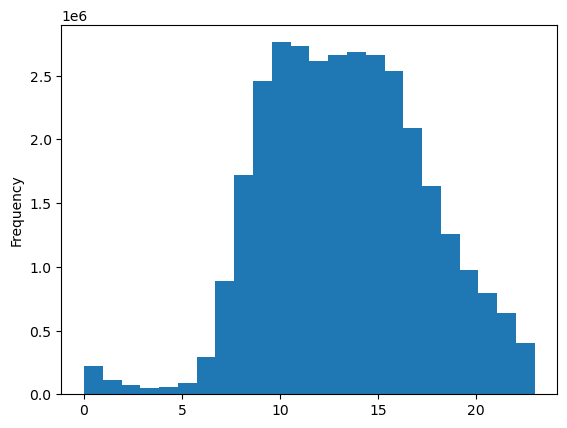

In [7]:
# Creating Histogram for 'order_hour_of_day' Column
hist = df['order_hour_of_day'].plot.hist(bins = 24)

In [8]:
# Exporting Image File
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

Most orders are placed between late morning and early afternoon, peaking around 9 AM to 4 PM, with fewer orders in the early morning and late evening.

## Create Bar Chart for 'loyalty_flag' Column

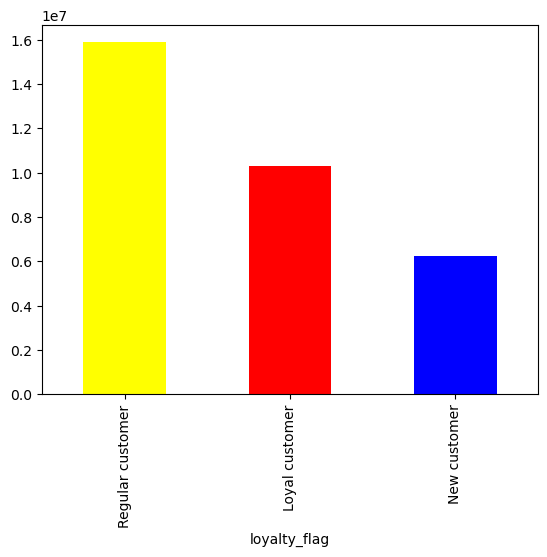

In [11]:
# Creating a Bar Chart for "loyalty_flag"
bar = df['loyalty_flag'].value_counts().plot.bar(color = ['yellow', 'red', 'blue'])

In [12]:
# Exporting Image File
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

Most customers are loyal (yellow), followed by regular (red), and new customers (blue).

## Check Whether There’s a Difference in Expenditure (the 'prices' Column) Depending on the Hour of the Day

In [15]:
# Craeting a List Holding True/False Values to the test no.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
# Storing 70% of the Sample in the Dataframe big
big = df[dev]

In [17]:
# Storing 30% of the Sample in the Dataframe small
small = df[~dev]

In [18]:
# Comparing the Dataframe Length to the Sum of Big and Small Samples
len(df)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
# Reducing the Sample to only the Necessary Columns
df_2 = small[['order_hour_of_day','prices']]

In [21]:
# Checking the Output
df_2.head()

order_hour_of_day  prices
0                  11     5.8
2                  21     5.8
3                  13     5.8
6                  14     5.8
10                 11     5.8

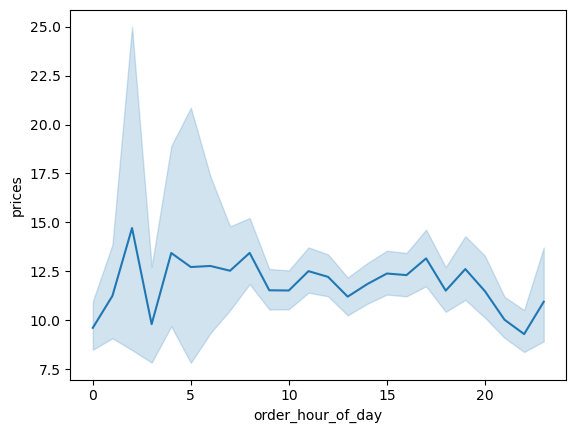

In [22]:
# Creating a Line Chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [23]:
# Exporting Image File
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hod.png'))

The chart indicates that spending is highest around midnight and early morning, followed by a drop and a relatively stable pattern throughout the day. There’s a slight increase in spending toward the end of the day.

## Determine Whether There’s a Connection between Age and Family Situation by Creating a Line Chart Exploring the Connections between Age and Number of Dependents

In [26]:
# Reducing the Sample to only the Necessary Columns
df_3 = small[['age','number_of_dependents']]

In [27]:
# Checking the Output
df_3.head()

age  number_of_dependents
0    81                     1
2    66                     2
3    40                     3
6    20                     3
10   61                     1

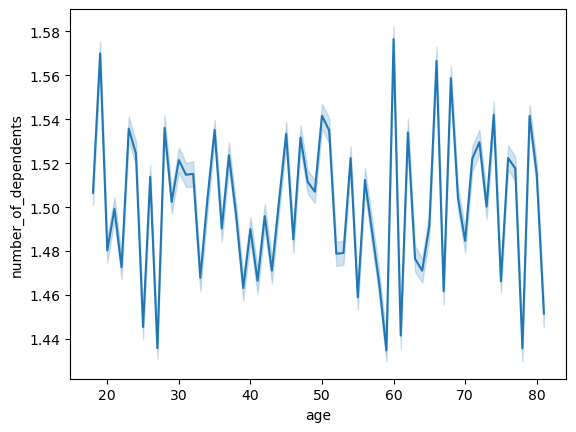

In [28]:
# Creating a Line Chart
line_1 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependents')

In [29]:
# Exporting Image File
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nod.png'))

The line chart does not reveal any clear trends or strong relationship between age and the number of dependents, as the line fluctuates without showing a consistent increase or decrease with age.

## Create a Scatterplot using the sns.scatterplot() Function to Explore whether There’s a Connection between Age and Spending Power (Income)

In [32]:
# Reducing the Sample to only the Necessary Columns
df_4 = small[['age','income']]

In [33]:
# Checking the Output
df_4.head()

age  income
0    81   49620
2    66  158302
3    40   31308
6    20   34171
10   61   42573

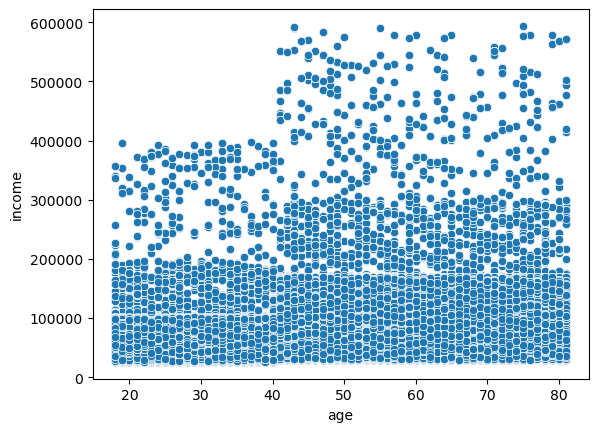

In [34]:
# Creating Scatterplot
sc_plot = sns.scatterplot(x = 'age', y = 'income',data = df_4)

In [35]:
# Exporting Image File
sc_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc_plot_age_income.png'))

Income varies widely among younger age groups (20-40), mostly at the lower end. After age 40, there's an upward trend, with more individuals in higher income brackets. While the scatterplot suggests income may rise with age, further analysis is needed to confirm this trend.